In [1]:
import pandas as pd
import numpy as np
import glob
import os
import munge_help

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_class_weight

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix,plot_roc_curve,plot_precision_recall_curve,plot_confusion_matrix, classification_report
#from plot_help import plot_confusion_matrix


from nltk.stem import WordNetLemmatizer 

import utils

import xgboost as xgb


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#train data
#X_train = utils.load_obj(path = os.path.join('data_processed', 'X_train.pkl'))

y_train = utils.load_obj(path = os.path.join('data_processed', 'y_train.pkl'))

X_train_num = utils.load_obj(path = os.path.join('data_processed', 'X_train_num.pkl'))

X_train_text = utils.load_obj(path = os.path.join('data_processed', 'X_train_text.pkl'))

In [3]:
X_test_num = utils.load_obj(path = os.path.join('data_processed', 'X_test_num.pkl'))

X_test_text = utils.load_obj(path = os.path.join('data_processed', 'X_test_text.pkl'))

y_test = utils.load_obj(path = os.path.join('data_processed', 'y_test.pkl'))


In [4]:
#explore numerical shape
X_train_num.shape

(102492, 111)

In [5]:
#explore nlp shape
X_train_text.shape

(102492, 100)

In [6]:
#combine horizontally
X_train = np.concatenate((X_train_num, X_train_text.toarray()), axis=1)
#check the shape with assertion
assert X_train.shape[1] == (X_train_num.shape[1] + X_train_text.shape[1])
#see the result
X_train.shape

(102492, 211)

In [7]:
#combine horizontally
X_test = np.concatenate((X_test_num, X_test_text.toarray()), axis=1)
#check the shape with assertion
assert X_test.shape[1] == (X_test_num.shape[1] + X_test_text.shape[1])
#see the result
X_train.shape

(102492, 211)

#### Logistic Reg

In [8]:
#instantiate with default params
lr = LogisticRegression(penalty='l2',
                        dual=False, 
                        tol=0.0001, 
                        C=1.0, 
                        fit_intercept=True, 
                        intercept_scaling=1, 
                        class_weight='balanced', 
                        random_state=None, 
                        solver='lbfgs', 
                        max_iter=100, 
                        multi_class='auto', 
                        verbose=0, 
                        warm_start=False, 
                        n_jobs=-1, 
                        l1_ratio=None)


Confusion Matrix in array form
[[4475  860]
 [  14   46]]


####################


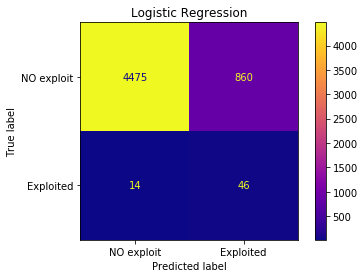

####################


              precision    recall  f1-score   support

  NO exploit       1.00      0.84      0.91      5335
   Exploited       0.05      0.77      0.10        60

    accuracy                           0.84      5395
   macro avg       0.52      0.80      0.50      5395
weighted avg       0.99      0.84      0.90      5395



In [9]:
lr.fit(X_train, y_train)

y_lr = lr.predict(X_test)

utils.metric_evaluation(lr, X_train, X_test, y_test, 'Logistic Regression')

#### Naive Bayes

In [10]:
nb = GaussianNB(priors=None, 
                var_smoothing=1e-09)

Confusion Matrix in array form
[[ 911 4424]
 [   3   57]]


####################


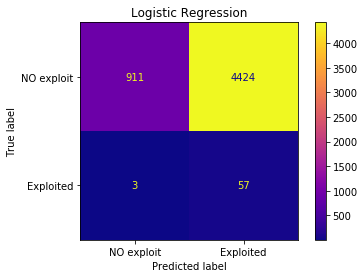

####################


              precision    recall  f1-score   support

  NO exploit       1.00      0.17      0.29      5335
   Exploited       0.01      0.95      0.03        60

    accuracy                           0.18      5395
   macro avg       0.50      0.56      0.16      5395
weighted avg       0.99      0.18      0.29      5395



In [11]:
nb.fit(X_train, y_train)

y_nb = nb.predict(X_test)

utils.metric_evaluation(nb, X_train, X_test, y_test, 'Logistic Regression')

### KNN

In [12]:
knn = KNeighborsClassifier(n_neighbors=5,
                           weights='uniform', 
                           algorithm='auto', 
                           leaf_size=30, 
                           p=2, 
                           metric='minkowski', 
                           metric_params=None, 
                           n_jobs=-1)

knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)


Confusion Matrix in array form
[[5323   12]
 [  55    5]]


####################


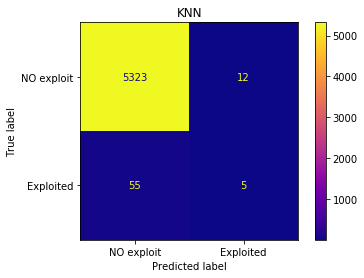

####################


              precision    recall  f1-score   support

  NO exploit       0.99      1.00      0.99      5335
   Exploited       0.29      0.08      0.13        60

    accuracy                           0.99      5395
   macro avg       0.64      0.54      0.56      5395
weighted avg       0.98      0.99      0.98      5395



In [13]:
utils.metric_evaluation(knn, X_train, X_test, y_test, 'KNN')

#### Random Forest

In [14]:
rf = RandomForestClassifier(n_estimators=100,
                            criterion='gini', 
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features='sqrt', 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            min_impurity_split=None, 
                            bootstrap=True, 
                            oob_score=False, 
                            n_jobs=-1, 
                            random_state=None, 
                            verbose=0, 
                            warm_start=False, 
                            class_weight='balanced', 
                            ccp_alpha=0.0, 
                            max_samples=None)
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)


Confusion Matrix in array form
[[5311   24]
 [  51    9]]


####################


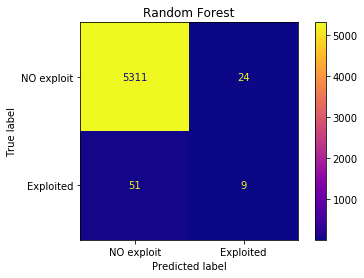

####################


              precision    recall  f1-score   support

  NO exploit       0.99      1.00      0.99      5335
   Exploited       0.27      0.15      0.19        60

    accuracy                           0.99      5395
   macro avg       0.63      0.57      0.59      5395
weighted avg       0.98      0.99      0.98      5395



In [15]:
utils.metric_evaluation(rf, X_train, X_test, y_test, title = 'Random Forest')

#### GBTree

In [16]:
gb = GradientBoostingClassifier(loss='deviance', 
                                    learning_rate=0.1, 
                                    n_estimators=100, 
                                    subsample=1.0, 
                                    criterion='friedman_mse', 
                                    min_samples_split=2, 
                                    min_samples_leaf=1, 
                                    min_weight_fraction_leaf=0.0, 
                                    max_depth=3, 
                                    min_impurity_decrease=0.0, 
                                    min_impurity_split=None, 
                                    init=None, 
                                    random_state=None, 
                                    max_features='sqrt', 
                                    verbose=0, 
                                    max_leaf_nodes=None, 
                                    warm_start=False, 
                                    presort='deprecated', 
                                    validation_fraction=0.1, 
                                    n_iter_no_change=None, 
                                    tol=0.0001, 
                                    ccp_alpha=0.0)

gb.fit(X_train, y_train)
y_gb_num = gb.predict(X_test)


Confusion Matrix in array form
[[5330    5]
 [  57    3]]


####################


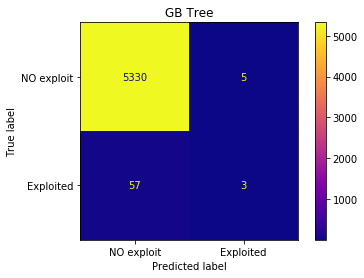

####################


              precision    recall  f1-score   support

  NO exploit       0.99      1.00      0.99      5335
   Exploited       0.38      0.05      0.09        60

    accuracy                           0.99      5395
   macro avg       0.68      0.52      0.54      5395
weighted avg       0.98      0.99      0.98      5395



In [17]:
utils.metric_evaluation(gb, X_train, X_test, y_test, title = 'GB Tree')

#### XGBoost

In [18]:
bst = xgb.XGBClassifier(n_estimators=100,
                        colsample_bytree=0.9, 
                        eta=0.9, 
                        max_depth=6, 
                        num_boost_round=10,
                        subsample=0.9, 
                        n_jobs=-1)

bst.fit(X_train, y_train)

y_xgb_num = bst.predict(X_test)

Confusion Matrix in array form
[[5329    6]
 [  53    7]]


####################


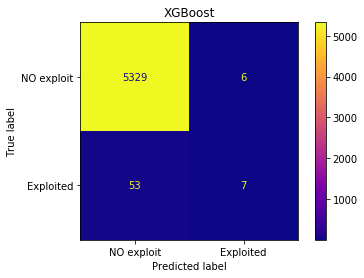

####################


              precision    recall  f1-score   support

  NO exploit       0.99      1.00      0.99      5335
   Exploited       0.54      0.12      0.19        60

    accuracy                           0.99      5395
   macro avg       0.76      0.56      0.59      5395
weighted avg       0.99      0.99      0.99      5395



In [19]:
utils.metric_evaluation(bst, X_train, X_test, y_test, title = 'XGBoost')

#### Comparing

Text(0.5, 1.0, 'ROC Curve')

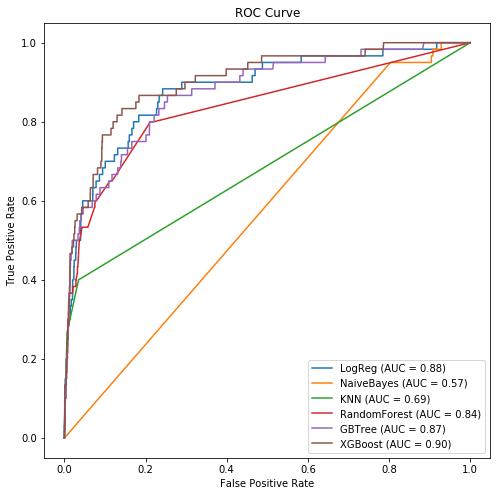

In [20]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
lr_roc = plot_roc_curve(lr, X_test, y_test, name='LogReg', ax=ax)
nb_roc = plot_roc_curve(nb, X_test, y_test, name='NaiveBayes', ax=ax)
knn_roc = plot_roc_curve(knn, X_test, y_test, name='KNN', ax=ax)
rf_roc = plot_roc_curve(rf, X_test, y_test, name='RandomForest', ax=ax)
gb_roc = plot_roc_curve(gb, X_test, y_test, name='GBTree', ax=ax)
xgb_roc = plot_roc_curve(bst, X_test, y_test, name='XGBoost', ax=ax)

plt.title("ROC Curve")

Text(0.5, 1.0, 'PRC Curve for Numerical Features')

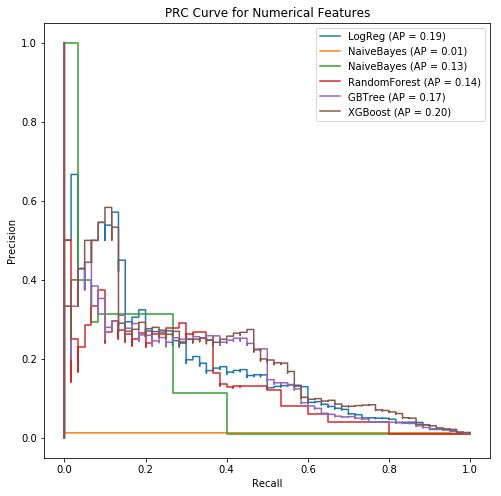

In [21]:
fig = plt.figure(figsize=(8,8))

ax = fig.gca()
lr_prc = plot_precision_recall_curve(lr, X_test, y_test, name='LogReg', ax=ax)
nb_prc = plot_precision_recall_curve(nb, X_test, y_test, name='NaiveBayes', ax=ax)
knn_prc = plot_precision_recall_curve(knn, X_test, y_test, name='NaiveBayes', ax=ax)
rf_prc = plot_precision_recall_curve(rf, X_test, y_test, name='RandomForest', ax=ax)
gb_prc = plot_precision_recall_curve(gb, X_test, y_test, name='GBTree', ax=ax)
xgb_prc = plot_precision_recall_curve(bst, X_test, y_test, name='XGBoost', ax=ax)

ax.legend(loc='upper right')
plt.title("PRC Curve for Numerical Features")